In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import scipy
from queue import Queue

# Exercise 1
Dùng Numpy implement thuật toán dbscan, test thử với dữ liệu.

In [87]:
xmoon, ymoon = make_moons(200, noise=.07, random_state=22)

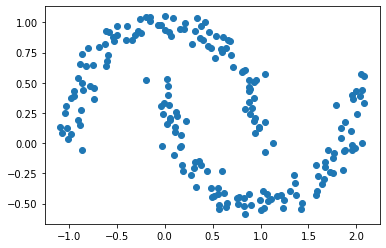

In [88]:
plt.scatter(xmoon[:, 0], xmoon[:, 1])

In [89]:
class dbscan2():
    def __init__(self,df, eps=0.5, min_points=5):
        self.df = np.array(df)
        self.eps = eps
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0

    def fit(self):
        "Fit the data"

        # Create labels column initialized to -1 (unclassified)
        self.df = np.append(self.df, np.array([[-1]*len(self.df)]).reshape(-1,1), axis=1)

        for x in range(len(self.df)):

            # if the point is not labled already then search for neighbors
            if self.df[x,2] != -1:
                continue

            # find neighbors
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)

            # If less neighbors than min_points then label as noise and continue
            if len(neighbors) < self.min_points:
                self.df[x,2] = self.noise
                continue

            # increment cluster label
            self.cluster_label += 1

            # set current row to new cluster label
            self.df[x,2] = self.cluster_label

            # create seed set to hold all neighbors of cluster including the neighbors already found
            found_neighbors = neighbors

            # create Queue to fold all neighbors of cluster
            q = Queue()

            # add original neighbors
            for x in neighbors:
                q.put(x)

            # While isnt empty label new neighbors to cluster
            while q.empty() == False:

                current = q.get()

                # if cur_row labled noise then change to cluster label (border point)
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label

                # If label is not -1(unclassified) then continue
                if self.df[current,2] != -1:
                    continue

                # label the neighbor
                self.df[current,2] = self.cluster_label

                # look for neightbors of cur_row
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)

                # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)

    def predict(self, x):
        preds = []

        for point in x:
            neighbors = self.rangeQuery(point)
            label = self.df[neighbors[0],2]
            preds.append(label)

        return preds

    def rangeQuery(self, x):
        """Query database against x and return all points that are <= eps"""
        neighbors = []

        for y in range(len(self.df)):
            q = self.df[y, :2]
            if self.dist(x, q) <= self.eps:
                neighbors.append(y)

        return neighbors

    def dist(self, point1, point2):
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]

        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)

In [90]:
model1 = dbscan2(xmoon, eps=0.3, min_points=5)
model1.fit()
label1 = model1.predict(xmoon)

In [99]:
model2 = dbscan2(xmoon, eps=0.15, min_points=5)
model2.fit()
label2 = model2.predict(xmoon)

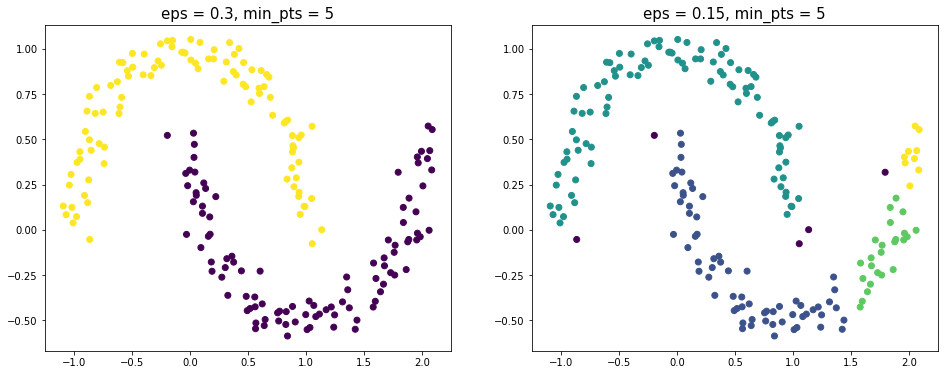

In [114]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

ax[0].scatter(xmoon[:, 0], xmoon[:, 1], c=label1)
ax[1].scatter(xmoon[:, 0], xmoon[:, 1], c=label2)
ax[0].set_title('eps = 0.3, min_pts = 5', fontsize=15)
ax[1].set_title('eps = 0.15, min_pts = 5', fontsize=15)
plt.show()

# Exercise 2
Ý nghĩa tham số radius, min sample trong thuật toán dbscan? Nếu chỉ số lớn, nhỏ ảnh hưởng thế nào tới thuật toán?

Nếu như trong phạm vi bán kính (radius) của 1 điểm có ít nhất min_sample điểm khác thì điểm đó sẽ được coi là core point

Nếu như radius nhỏ thì thuật toán sẽ chia ra làm nhiều cluster hơn
Nếu radius to thì sẽ chia làm ít cluster hơn vì các core point sẽ giao nhau nhiều hơn và nếu radius quá to thì tất cả các điểm dữ liệu sẽ cùng thuộc 1 cluster

Nếu min sample lớn thì sẽ ít điểm có thể trở thành core point hơn và sẽ có nhiều noise point